In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("Marine_Microplastics.csv")
df

,OBJECTID,Oceans,Regions,SubRegions,Sampling Method,Measurement,Unit,Density Range,Density Class,Short Reference,...,Organization,Keywords,Accession Number,Accession Link,Latitude,Longitude,Date,GlobalID,x,y
0,9676,Atlantic Ocean,NaN,NaN,Grab sample,0.0180,pieces/m3,0.005-1,Medium,Barrows et al.2018,...,Adventure Scientist,Adventure Scientist/Citizen Science,211009,https://www.ncei.noaa.gov/access/metadata/land...,-31.696000,-48.560000,8/11/2015 12:00:00 AM,a77121b2-e113-444e-82d9-7af11d62fdd2,-48.560000,-31.696000
1,6427,Pacific Ocean,NaN,NaN,Neuston net,0.0000,pieces/m3,0-0.0005,Very Low,Law et al.2014,...,Sea Education Association,SEA,211008,https://www.ncei.noaa.gov/access/metadata/land...,6.350000,-121.850000,12/18/2002 12:00:00 AM,be27c450-02ca-4261-8d89-cae21108e6cc,-121.850000,6.350000
2,10672,Pacific Ocean,NaN,NaN,Manta net,0.0130,pieces/m3,0.005-1,Medium,Goldstein et al.2013,...,Scripps Institution of Oceanography-University...,Great Pacific Garbage Patch/SEAPLEX,253448,https://www.ncei.noaa.gov/access/metadata/land...,0.500000,-95.350000,10/17/2006 12:00:00 AM,23effcdd-35b7-4e1e-adb4-390693a287d3,-95.350000,0.500000
3,13921,Atlantic Ocean,NaN,NaN,Aluminum bucket,1368.0000,pieces/m3,>=10,Very High,Queiroz et al.2022,...,"Federal University of Pará, Brazil",Amazon Continental Shelf,276482,https://www.ncei.noaa.gov/access/metadata/land...,0.631825,-45.398158,10/17/2018 12:00:00 AM,16d77822-0533-4116-97b9-0bdb592f3d6e,-45.398158,0.631825
4,9344,Pacific Ocean,NaN,NaN,Grab sample,0.0010,pieces/m3,0.0005-0.005,Low,Barrows et al.2018,...,Adventure Scientist,Adventure Scientist/Citizen Science,211009,https://www.ncei.noaa.gov/access/metadata/land...,16.623000,-99.697800,1/3/2015 12:00:00 AM,b9e435e3-9e86-4143-8b51-877e5dcdc7a6,-99.697800,16.623000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20420,9366,Atlantic Ocean,NaN,NaN,Grab sample,0.0110,pieces/m3,0.005-1,Medium,Barrows et al.2018,...,Adventure Scientist,Adventure Scientist/Citizen Science,211009,https://www.ncei.noaa.gov/access/metadata/land...,17.100000,-47.550000,2/1/2015 12:00:00 AM,fd4db6d6-aed7-48b1-a22b-402557112e2f,-47.550000,17.100000
20421,4683,Atlantic Ocean,Caribbean Sea,NaN,Neuston net,0.0216,pieces/m3,0.005-1,Medium,Law et al.2010,...,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,21.390000,-81.960000,3/14/2001 12:00:00 AM,83a8208e-2d06-4ad9-bcd9-81e29d57e0aa,-81.960000,21.390000
20422,6043,Atlantic Ocean,NaN,NaN,Neuston net,0.0000,pieces/m3,0-0.0005,Very Low,Law et al.2010,...,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,24.140000,-81.980000,5/1/2008 12:00:00 AM,0fd72d83-cd27-42e1-b63a-b015c23b28d2,-81.980000,24.140000
20423,20169,Atlantic Ocean,NaN,NaN,Hand picking,NaN,pieces/10 mins,40-200,High,Tunnell et al. 2020,...,University of Texas Marine Science Institute,Nurdle Patrol,259486,https://www.ncei.noaa.gov/access/metadata/land...,39.924800,-75.127200,10/28/2021 12:00:00 AM,fc84069e-c782-4c3d-bf6b-265535969d8e,-75.127200,39.924800


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20425 entries, 0 to 20424
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OBJECTID          20425 non-null  int64  
 1   Oceans            20154 non-null  object 
 2   Regions           8885 non-null   object 
 3   SubRegions        1307 non-null   object 
 4   Sampling Method   20425 non-null  object 
 5   Measurement       14613 non-null  float64
 6   Unit              20425 non-null  object 
 7   Density Range     20425 non-null  object 
 8   Density Class     20425 non-null  object 
 9   Short Reference   20425 non-null  object 
 10  Long Reference    20425 non-null  object 
 11  DOI               20425 non-null  object 
 12  Organization      20425 non-null  object 
 13  Keywords          20407 non-null  object 
 14  Accession Number  20425 non-null  int64  
 15  Accession Link    20425 non-null  object 
 16  Latitude          20425 non-null  float6

In [8]:
# Drop irrelevant columns
drop_cols = ["OBJECTID", "Short Reference", "Long Reference", "DOI", "Organization", 
             "Accession Number", "Accession Link", "GlobalID", "Date"]
df_cleaned = df.drop(columns=drop_cols)

# Handle missing values: Fill categorical NaNs with "Unknown" and numerical NaNs with median
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

df_cleaned[categorical_cols] = df_cleaned[categorical_cols].fillna("Unknown")
df_cleaned[numerical_cols] = df_cleaned[numerical_cols].fillna(df_cleaned[numerical_cols].median())

# Convert categorical columns to numerical using label encoding
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

# Display cleaned dataset info
df_cleaned.info(), df_cleaned.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20425 entries, 0 to 20424
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Oceans           20425 non-null  int32  
 1   Regions          20425 non-null  int32  
 2   SubRegions       20425 non-null  int32  
 3   Sampling Method  20425 non-null  int32  
 4   Measurement      20425 non-null  float64
 5   Unit             20425 non-null  int32  
 6   Density Range    20425 non-null  int32  
 7   Density Class    20425 non-null  int32  
 8   Keywords         20425 non-null  int32  
 9   Latitude         20425 non-null  float64
 10  Longitude        20425 non-null  float64
 11  x                20425 non-null  float64
 12  y                20425 non-null  float64
dtypes: float64(5), int32(8)
memory usage: 1.4 MB


(None,
    Oceans  Regions  SubRegions  Sampling Method  Measurement  Unit  \
 0       1       46          15                4        0.018     2   
 1       3       46          15               10        0.000     2   
 2       3       46          15                7        0.013     2   
 3       1       46          15                1     1368.000     2   
 4       3       46          15                4        0.001     2   
 
    Density Range  Density Class  Keywords   Latitude   Longitude           x  \
 0              5              2         1 -31.696000  -48.560000  -48.560000   
 1              1              4        31   6.350000 -121.850000 -121.850000   
 2              5              2         8   0.500000  -95.350000  -95.350000   
 3             17              3         3   0.631825  -45.398158  -45.398158   
 4              4              1         1  16.623000  -99.697800  -99.697800   
 
            y  
 0 -31.696000  
 1   6.350000  
 2   0.500000  
 3   0.631825

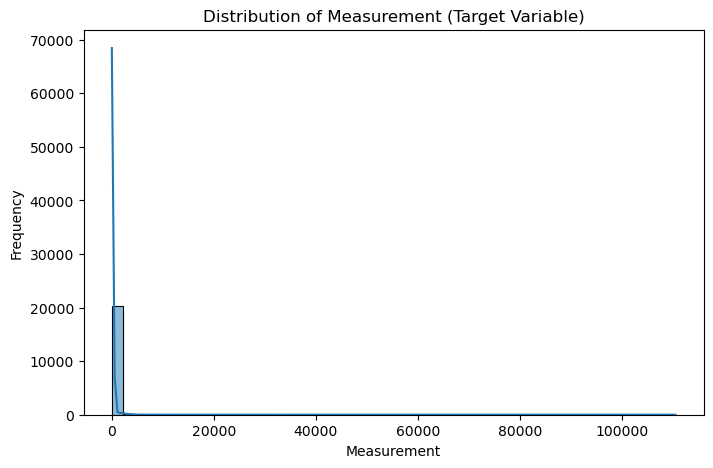

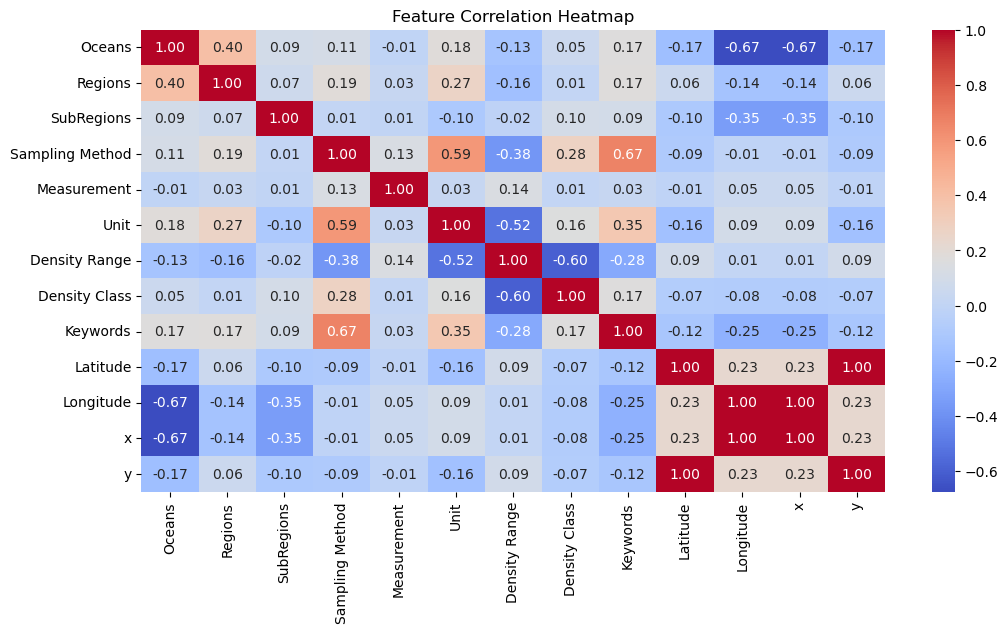

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of the target variable (Measurement)
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned["Measurement"], bins=50, kde=True)
plt.title("Distribution of Measurement (Target Variable)")
plt.xlabel("Measurement")
plt.ylabel("Frequency")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Define features and target variable
X = df_cleaned.drop(columns=["Measurement"])  # Features
y = df_cleaned["Measurement"]  # Target

# Apply log transformation to the target variable to handle skewness
y = np.log1p(y)

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Check shape of train and test sets
X_train.shape, X_test.shape

((16340, 12), (4085, 12))